data: https://www.kaggle.com/code/tawfikelmetwally/census-income-analysis-and-modeling/input

# **1. Importing Data and Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
#machine learning libraries:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import RocCurveDisplay

#evaluation
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import r2_score,f1_score, precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import r2_score,f1_score, precision_score, recall_score
from sklearn.metrics import precision_recall_curve

import warnings
warnings.filterwarnings('ignore')

# **2. Data Pre-Processing**

## **2.1 Input data**

In [ ]:
train_data= pd.read_csv('adult.csv')
test_data= pd.read_csv('adult.test.csv')

In [ ]:
train_data.head()

,Age,Workclass,Final Weight,Education,EducationNum,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,capital loss,Hours per Week,Native Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
test_data.head()

,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0.1,40,United-States,<=50K.
0,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
1,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
2,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
3,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.


In [ ]:
# Menyamakan nama kolom test dengan nama kolom train
columns=train_data.columns
test_data.columns=columns

In [ ]:
# Menggabungkan data train dan test
df = pd.concat([train_data, test_data], axis= 0)

In [ ]:
df.head()

,Age,Workclass,Final Weight,Education,EducationNum,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,capital loss,Hours per Week,Native Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## **2.2 Data Understanding**

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,48841.0,38.643865,13.710511,17.0,28.0,37.0,48.0,90.0
Final Weight,48841.0,189663.374214,105604.972833,12285.0,117549.0,178142.0,237646.0,1490400.0
EducationNum,48841.0,10.078152,2.570961,1.0,9.0,10.0,12.0,16.0
Capital Gain,48841.0,1079.089720,7452.093748,0.0,0.0,0.0,0.0,99999.0
capital loss,48841.0,87.504105,403.008483,0.0,0.0,0.0,0.0,4356.0
Hours per Week,48841.0,40.422391,12.391571,1.0,40.0,40.0,45.0,99.0


### **Cek data duplikat**

In [ ]:
df[(df.duplicated())]

,Age,Workclass,Final Weight,Education,EducationNum,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,capital loss,Hours per Week,Native Country,Income
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9171,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11631,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13084,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
15059,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
17040,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18555,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,?,<=50K
18698,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
21318,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48841 entries, 0 to 16279
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             48841 non-null  int64 
 1   Workclass       48841 non-null  object
 2   Final Weight    48841 non-null  int64 
 3   Education       48841 non-null  object
 4   EducationNum    48841 non-null  int64 
 5   Marital Status  48841 non-null  object
 6   Occupation      48841 non-null  object
 7   Relationship    48841 non-null  object
 8   Race            48841 non-null  object
 9   Gender          48841 non-null  object
 10  Capital Gain    48841 non-null  int64 
 11  capital loss    48841 non-null  int64 
 12  Hours per Week  48841 non-null  int64 
 13  Native Country  48841 non-null  object
 14  Income          48841 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


In [ ]:
df.duplicated().sum()

np.int64(29)

### **Menghapus data duplikat**

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,48812.0,38.647628,13.709006,17.0,28.0,37.0,48.0,90.0
Final Weight,48812.0,189667.144206,105607.191386,12285.0,117553.5,178138.5,237621.0,1490400.0
EducationNum,48812.0,10.078751,2.570245,1.0,9.0,10.0,12.0,16.0
Capital Gain,48812.0,1079.730824,7454.260737,0.0,0.0,0.0,0.0,99999.0
capital loss,48812.0,87.556093,403.122539,0.0,0.0,0.0,0.0,4356.0
Hours per Week,48812.0,40.425059,12.391081,1.0,40.0,40.0,45.0,99.0


### **Melihat data unik dari beberapa kolom kategori**

In [ ]:
df['Education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [ ]:
df['Workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [ ]:
df['Marital Status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [ ]:
df['Occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [ ]:
df['Race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [ ]:
df['Income'].unique()

array([' <=50K', ' >50K', ' <=50K.', ' >50K.'], dtype=object)

## **2.3 Data Cleaning**

In [ ]:
#Mencopy data
df_copy1= df.copy()

In [ ]:
#Membersihkan spasi pada kolom bertipe string
for col in columns:
    if df[col].dtype in ['O']:
        df[col]=df[col].str.strip()

In [ ]:
df['Workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

### **Memperbaiki data pada Workclass**

In [ ]:
#Mengubah "?" dengan NaN
df.replace("?", np.nan, inplace=True)

In [ ]:
df

,Age,Workclass,Final Weight,Education,EducationNum,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,capital loss,Hours per Week,Native Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16276,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16277,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16278,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


### **Melihat data Nan**

In [ ]:
#Melihat jumlah NaN pada masing-masing kolom
df.isna().sum()

,0
Age,0
Workclass,2799
Final Weight,0
Education,0
EducationNum,0
Marital Status,0
Occupation,2809
Relationship,0
Race,0
Gender,0


**`Terlihat selisih NaN pada workclass dengan occupation adalah 10 `**

In [ ]:
# Melihat NaN pada kolom Occupation dan tidak NaN pada kolom Workclass
df[df['Occupation'].isna() & ~df['Workclass'].isna()]

,Age,Workclass,Final Weight,Education,EducationNum,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,capital loss,Hours per Week,Native Country,Income
5361,18,Never-worked,206359,10th,6,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,<=50K
10845,23,Never-worked,188535,7th-8th,4,Divorced,NaN,Not-in-family,White,Male,0,0,35,United-States,<=50K
14772,17,Never-worked,237272,10th,6,Never-married,NaN,Own-child,White,Male,0,0,30,United-States,<=50K
20337,18,Never-worked,157131,11th,7,Never-married,NaN,Own-child,White,Female,0,0,10,United-States,<=50K
23232,20,Never-worked,462294,Some-college,10,Never-married,NaN,Own-child,Black,Male,0,0,40,United-States,<=50K
32304,30,Never-worked,176673,HS-grad,9,Married-civ-spouse,NaN,Wife,Black,Female,0,0,40,United-States,<=50K
32314,18,Never-worked,153663,Some-college,10,Never-married,NaN,Own-child,White,Male,0,0,4,United-States,<=50K
8784,17,Never-worked,131593,11th,7,Never-married,NaN,Own-child,Black,Female,0,0,20,United-States,<=50K.
11606,20,Never-worked,273905,HS-grad,9,Married-spouse-absent,NaN,Other-relative,White,Male,0,0,35,United-States,<=50K.
13897,18,Never-worked,162908,11th,7,Never-married,NaN,Own-child,White,Male,0,0,35,United-States,<=50K.


In [ ]:
df['Workclass'].value_counts()

,count
Workclass,
Private,33878
Self-emp-not-inc,3861
Local-gov,3136
State-gov,1981
Self-emp-inc,1694
Federal-gov,1432
Without-pay,21
Never-worked,10


***`Hal ini logis NaN pada Occupation tidak memiliki pekerjaan, agar menjaga makna data maka NaN pada Occupation yang tidak memiliki pekerjaan maka diganti dengan No-Occupation`***

In [ ]:
df[df['Workclass']=='Never-worked']= df[df['Workclass']=='Never-worked'].fillna('No-occupation')
df[df['Workclass']=='Never-worked']

,Age,Workclass,Final Weight,Education,EducationNum,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,capital loss,Hours per Week,Native Country,Income
5361,18,Never-worked,206359,10th,6,Never-married,No-occupation,Own-child,White,Male,0,0,40,United-States,<=50K
10845,23,Never-worked,188535,7th-8th,4,Divorced,No-occupation,Not-in-family,White,Male,0,0,35,United-States,<=50K
14772,17,Never-worked,237272,10th,6,Never-married,No-occupation,Own-child,White,Male,0,0,30,United-States,<=50K
20337,18,Never-worked,157131,11th,7,Never-married,No-occupation,Own-child,White,Female,0,0,10,United-States,<=50K
23232,20,Never-worked,462294,Some-college,10,Never-married,No-occupation,Own-child,Black,Male,0,0,40,United-States,<=50K
32304,30,Never-worked,176673,HS-grad,9,Married-civ-spouse,No-occupation,Wife,Black,Female,0,0,40,United-States,<=50K
32314,18,Never-worked,153663,Some-college,10,Never-married,No-occupation,Own-child,White,Male,0,0,4,United-States,<=50K
8784,17,Never-worked,131593,11th,7,Never-married,No-occupation,Own-child,Black,Female,0,0,20,United-States,<=50K.
11606,20,Never-worked,273905,HS-grad,9,Married-spouse-absent,No-occupation,Other-relative,White,Male,0,0,35,United-States,<=50K.
13897,18,Never-worked,162908,11th,7,Never-married,No-occupation,Own-child,White,Male,0,0,35,United-States,<=50K.


In [ ]:
df['Occupation'].isna().sum()

np.int64(2799)

In [ ]:
df[df['Occupation'].isna() & df['Workclass'].isna()]

,Age,Workclass,Final Weight,Education,EducationNum,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,capital loss,Hours per Week,Native Country,Income
27,54,NaN,180211,Some-college,10,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,NaN,293936,7th-8th,4,Married-spouse-absent,NaN,Not-in-family,White,Male,0,0,40,NaN,<=50K
69,25,NaN,200681,Some-college,10,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,NaN,212759,10th,6,Married-civ-spouse,NaN,Husband,White,Male,0,0,2,United-States,<=50K
106,17,NaN,304873,10th,6,Never-married,NaN,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16120,61,NaN,265201,Some-college,10,Married-civ-spouse,NaN,Husband,White,Male,0,0,14,United-States,<=50K.
16207,21,NaN,212661,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.
16238,73,NaN,144872,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,25,Canada,<=50K.
16250,81,NaN,26711,Assoc-voc,11,Married-civ-spouse,NaN,Husband,White,Male,2936,0,20,United-States,<=50K.


---
>***`Karena Workclass dan Occupation sama-sama kosong (NaN) dan proporsinya cukup besar sekitar 5%, maka diisi "Unknown" karena tidak ada dasar yang valid untuk menentukan kategorinya.`***


---

### **Mengubah data Nan menjadi Unknown (Workclass dan Occupation)**

In [ ]:
df['Workclass'] = df['Workclass'].fillna('Unknown')
df['Occupation'] = df['Occupation'].fillna('Unknown')

In [ ]:
df['Native Country'].value_counts()[0:5]

,count
Native Country,
United-States,43809
Mexico,947
Philippines,295
Germany,206
Puerto-Rico,184


In [ ]:
df['Native Country'].value_counts(normalize=True) * 100

,proportion
Native Country,
United-States,91.352490
Mexico,1.974727
Philippines,0.615147
Germany,0.429560
Puerto-Rico,0.383685
Canada,0.379515
El-Salvador,0.323213
India,0.314872
Cuba,0.287764


---
>**91.3% data Native Country adalah United-States, sehingga dibuat simplifikasi menjadi 2 kategori saja United-States dan Non US**
---

In [ ]:
df['Native Country'] = df['Native Country'].where(
    df['Native Country'] == 'United-States',
    'Non US'
)

In [ ]:
df['Native Country'].unique()

array(['United-States', 'Non US'], dtype=object)

In [ ]:
df['Native Country'].isna().sum()

np.int64(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48812 entries, 0 to 16279
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             48812 non-null  int64 
 1   Workclass       48812 non-null  object
 2   Final Weight    48812 non-null  int64 
 3   Education       48812 non-null  object
 4   EducationNum    48812 non-null  int64 
 5   Marital Status  48812 non-null  object
 6   Occupation      48812 non-null  object
 7   Relationship    48812 non-null  object
 8   Race            48812 non-null  object
 9   Gender          48812 non-null  object
 10  Capital Gain    48812 non-null  int64 
 11  capital loss    48812 non-null  int64 
 12  Hours per Week  48812 non-null  int64 
 13  Native Country  48812 non-null  object
 14  Income          48812 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


In [ ]:
df.isna().sum()

,0
Age,0
Workclass,0
Final Weight,0
Education,0
EducationNum,0
Marital Status,0
Occupation,0
Relationship,0
Race,0
Gender,0


In [ ]:
df['Income'] = df['Income'].replace({
    '<=50K.': '<=50K',
    '>50K.': '>50K'
})

In [ ]:
df['Income'].unique()


array(['<=50K', '>50K'], dtype=object)

In [ ]:
df['Income'].value_counts(normalize=True) * 100

,proportion
Income,
<=50K,76.061214
>50K,23.938786


# **3. Exploratory Data Analysis**

In [ ]:
num_cols = ['Age', 'Final Weight', 'EducationNum',
            'Capital Gain', 'capital loss', 'Hours per Week']

df[num_cols].describe()

,Age,Final Weight,EducationNum,Capital Gain,capital loss,Hours per Week
count,48812.000000,4.881200e+04,48812.000000,48812.000000,48812.000000,48812.000000
mean,38.647628,1.896671e+05,10.078751,1079.730824,87.556093,40.425059
std,13.709006,1.056072e+05,2.570245,7454.260737,403.122539,12.391081
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175535e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781385e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376210e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


## **3.1 Data Numerical**

### **Distribusi Numerik**

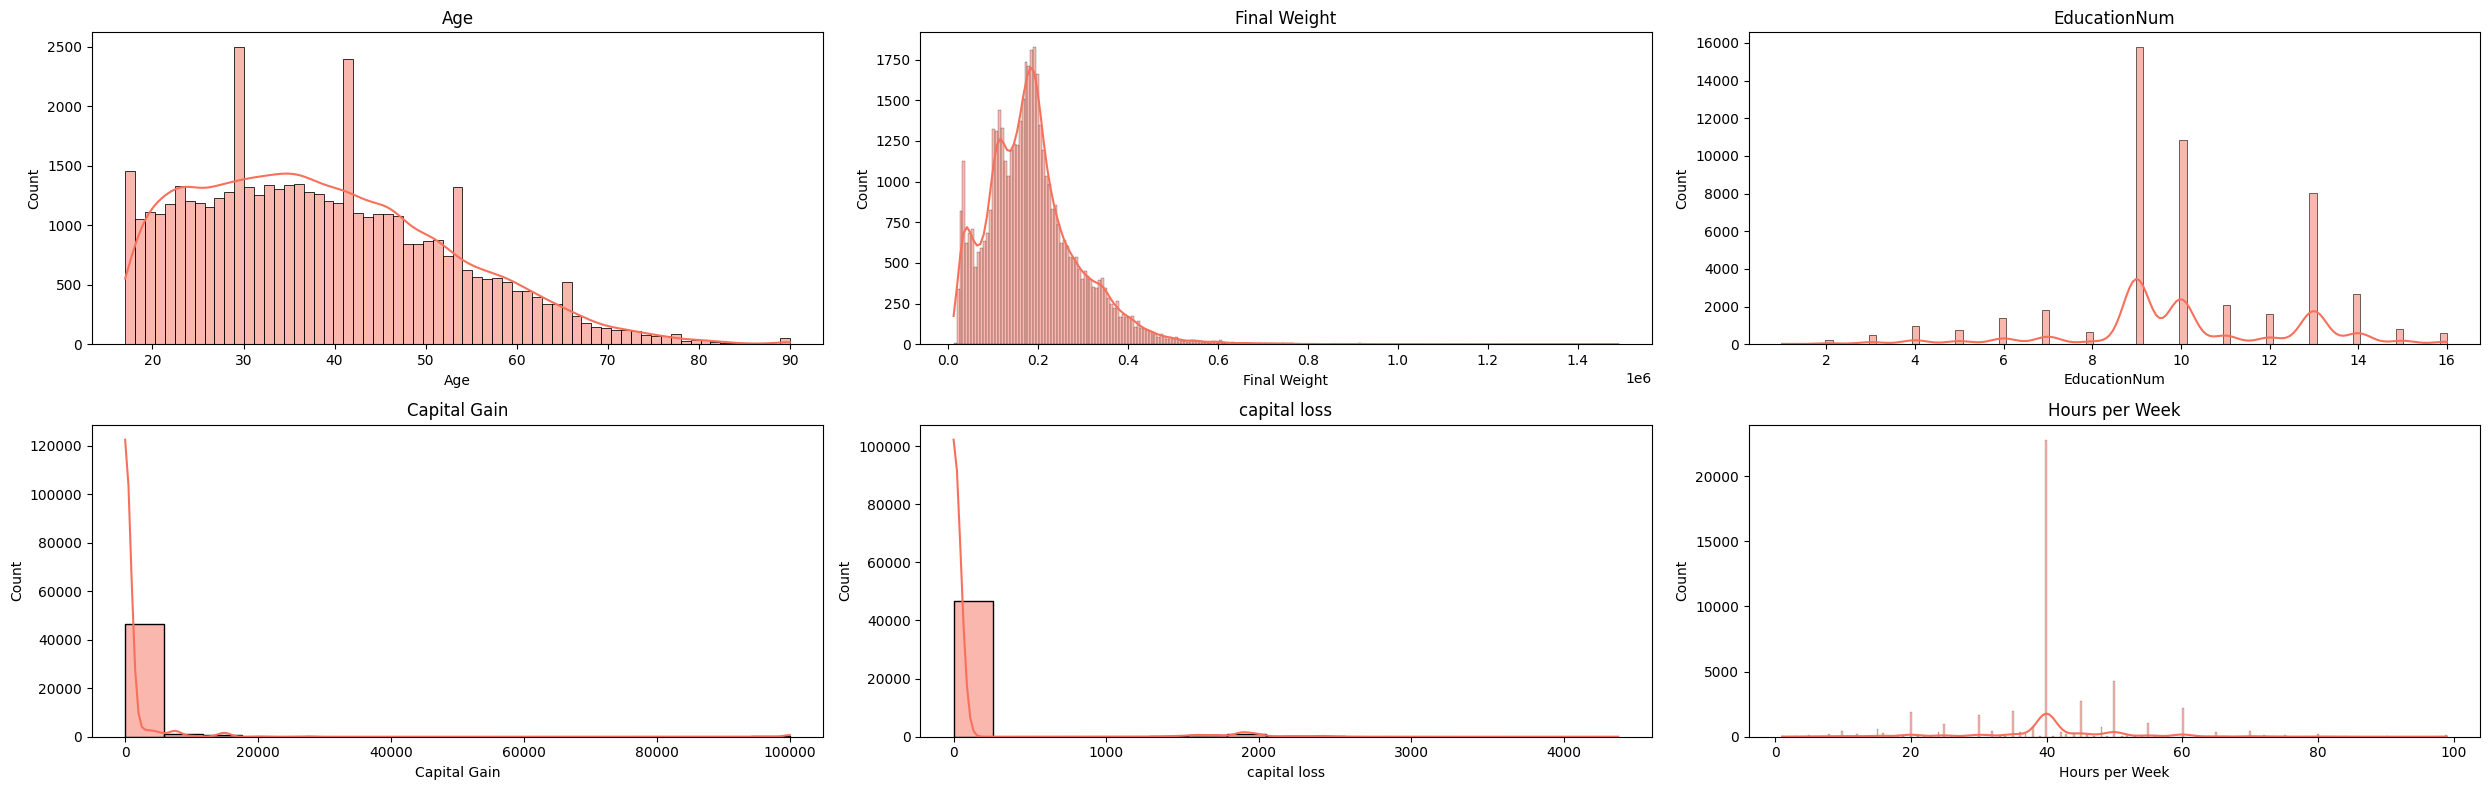

In [ ]:
# Distribusi Fitur Numerik

magma_color = plt.cm.magma(0.7)

fig, axes = plt.subplots(2, 3, figsize=(25, 8))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(df[col], kde=True, ax=axes[i], color=magma_color)
    axes[i].set_title(col)

plt.tight_layout()
plt.show()


---
>**Insight Distribusi Numerik**
1. Age
- Mayoritas individu dengan konsentrasi tertinggi antara 20-45 tahun
- Puncak kepadatan ada di sekitar usia 30–40 tahun.
- Setelah usia 50 tahun, jumlah individu menurun tajam.

2. Final Weight
- Variabel ini biasanya merepresentasikan "bobot sensus" (berapa banyak orang yang diwakili oleh baris data tersebut).
- Sebagian besar data terkumpul di angka rendah (0 - 400.000)

3. EducationNum
- Puncak di angka 9: Lulusan SMA (High School grad) — ini adalah kelompok terbesar.
- Puncak di angka 10: Some college (Pernah kuliah tapi tidak selesai/Diploma).
- Puncak di angka 13: Lulusan Sarjana (Bachelors).
- Ini menunjukkan bahwa mayoritas tenaga kerja dalam dataset ini setidaknya tamatan SMA.

4. Capital Gain (Keuntungan Modal)
- Bentuk Distribusi: Ekstrim miring ke kanan (Extremely Right-skewed) & Terinflasi Nol (Zero-inflated).
- Lihat batang tinggi di angka 0. Ini berarti hampir semua orang (mayoritas mutlak) tidak memiliki keuntungan modal (capital gain) dari investasi/saham.

5. Capital Loss (Kerugian Modal)
- Sama seperti Capital Gain, mayoritas individu memiliki nilai 0.
- Ini menunjukkan bahwa investasi aset bukan sumber pendapatan atau kerugian utama bagi populasi umum dalam sensus ini.

6. Hours per Week (Jam Kerja per Minggu)
- Terdapat satu batang yang sangat tinggi tepat di angka 40 jam. Ini masuk akal karena 40 jam adalah standar jam kerja penuh waktu (full-time) di banyak negara (Senin-Jumat, 9-5).
- ada distribusi kecil di bawah 40 (pekerja paruh waktu/part-time) dan di atas 40 (lembur atau pekerja keras yang bekerja 50-60 jam/minggu).

---

### **Age, Hours per week, EducationNum vs Income**

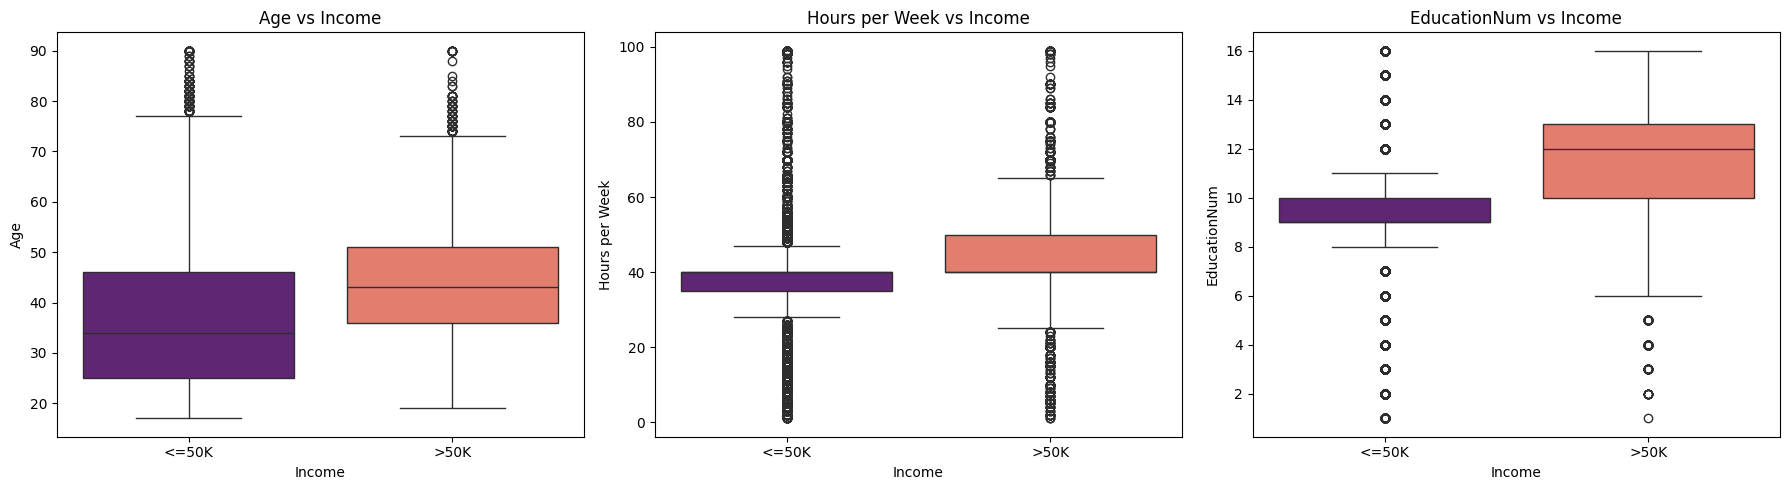

In [ ]:
palette_magma = [plt.cm.magma(0.3), plt.cm.magma(0.7)]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(x='Income', y='Age', data=df, ax=axes[0], palette= palette_magma )
axes[0].set_title('Age vs Income')

sns.boxplot(x='Income', y='Hours per Week', data=df,  ax=axes[1], palette= palette_magma)
axes[1].set_title('Hours per Week vs Income')

sns.boxplot(x='Income', y='EducationNum', data=df, ax=axes[2], palette= palette_magma)
axes[2].set_title('EducationNum vs Income')


plt.tight_layout()
plt.show()



---

***Insight Grafik Boxplot (Age, Hours per Week, EducationNum vs Income)***

**Age vs Income**

* Individu dengan **income >50K** memiliki **median usia lebih tinggi** dibandingkan kelompok ≤50K.
* Kelompok ≤50K didominasi usia lebih muda, menunjukkan fase awal atau menengah karier.
* Hal ini mengindikasikan bahwa **pengalaman kerja yang seiring bertambahnya usia** berkontribusi terhadap peningkatan pendapatan.

---

**Hours per Week vs Income**

* Kelompok **income >50K** cenderung bekerja **lebih lama**, dengan median jam kerja sekitar **40–50 jam per minggu**.
* Kelompok ≤50K umumnya bekerja mendekati jam kerja standar (±40 jam/minggu).
* Jam kerja yang lebih panjang berkorelasi positif dengan peluang memperoleh pendapatan yang lebih tinggi.

---
**EducationNum vs Income**

* Perbedaan distribusi **EducationNum** antara kedua kelompok income terlihat paling jelas.
* Individu dengan **income >50K** memiliki tingkat pendidikan yang lebih tinggi (Bachelor ke atas).
* Pendidikan menunjukkan pengaruh paling signifikan terhadap tingkat pendapatan dibandingkan usia dan jam kerja.

---

 **Kesimpulan Utama**

> Individu dengan pendapatan lebih dari 50K cenderung berusia lebih tua, bekerja lebih lama, dan memiliki tingkat pendidikan yang lebih tinggi. Dari ketiga variabel yang dianalisis, **tingkat pendidikan merupakan faktor yang paling dominan dalam membedakan kelompok pendapatan**.

---

### **Korelasi Data Numerikal**

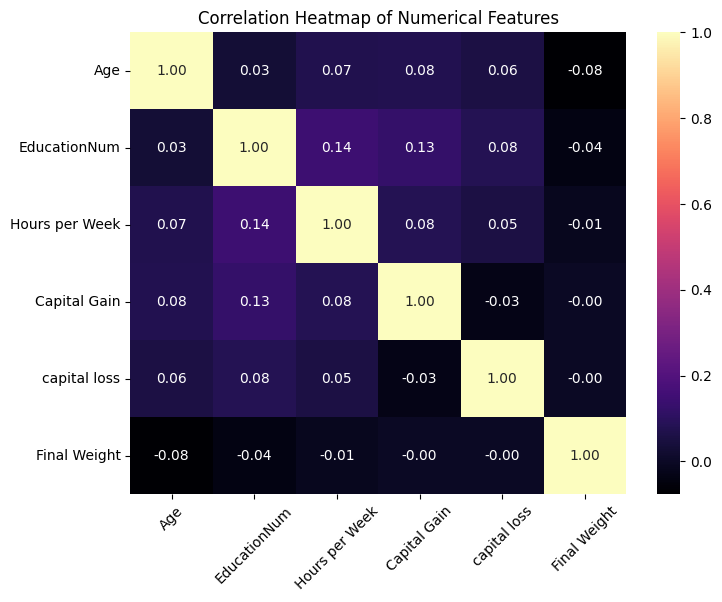

In [ ]:
num_cols = [
    'Age', 'EducationNum', 'Hours per Week',
    'Capital Gain', 'capital loss', 'Final Weight'
]

plt.figure(figsize=(8,6))
sns.heatmap(
    df[num_cols].corr(),
    annot=True,
    cmap='magma',
    fmt='.2f'
)
plt.title('Correlation Heatmap of Numerical Features')
plt.xticks(rotation=45)
plt.show()


---

***Insight Correlation Heatmap (Fitur Numerik)***

**Hubungan antar fitur numerik**

* Secara umum, **tidak terdapat korelasi yang kuat** antar fitur numerik.
* Sebagian besar nilai korelasi berada di rentang **-0.1 hingga 0.15**, yang menunjukkan hubungan **lemah**.

* Hubungan EducationNum vs Hours per Week (0.14):

Ini adalah korelasi positif tertinggi. Sedikit indikasi bahwa orang dengan pendidikan lebih tinggi cenderung memiliki jam kerja yang lebih panjang (mungkin posisi manajerial atau profesional).

* Hubungan EducationNum vs Capital Gain (0.13):

Orang berpendidikan tinggi memiliki sedikit kecenderungan lebih besar untuk memiliki investasi (capital gain).

---

**EducationNum**

* Memiliki korelasi positif tertinggi (meskipun lemah) dengan:

  * **Hours per Week (0.14)**
  * **Capital Gain (0.13)**
* Hal ini menunjukkan bahwa individu dengan tingkat pendidikan lebih tinggi cenderung:

  * Bekerja sedikit lebih lama
  * Memiliki peluang memperoleh capital gain

---



## **3.2 Data Categorical**

In [ ]:
pd.crosstab(df['Education'], df['Income'], normalize='index') * 100

Income,<=50K,>50K
Education,,
10th,93.736501,6.263499
11th,94.919934,5.080066
12th,92.682927,7.317073
1st-4th,96.734694,3.265306
5th-6th,94.685039,5.314961
7th-8th,93.501048,6.498952
9th,94.576720,5.423280
Assoc-acdm,74.203623,25.796377
Assoc-voc,74.660194,25.339806


### **Distribusi Income berdasarkan Tingkat Pendidikan**

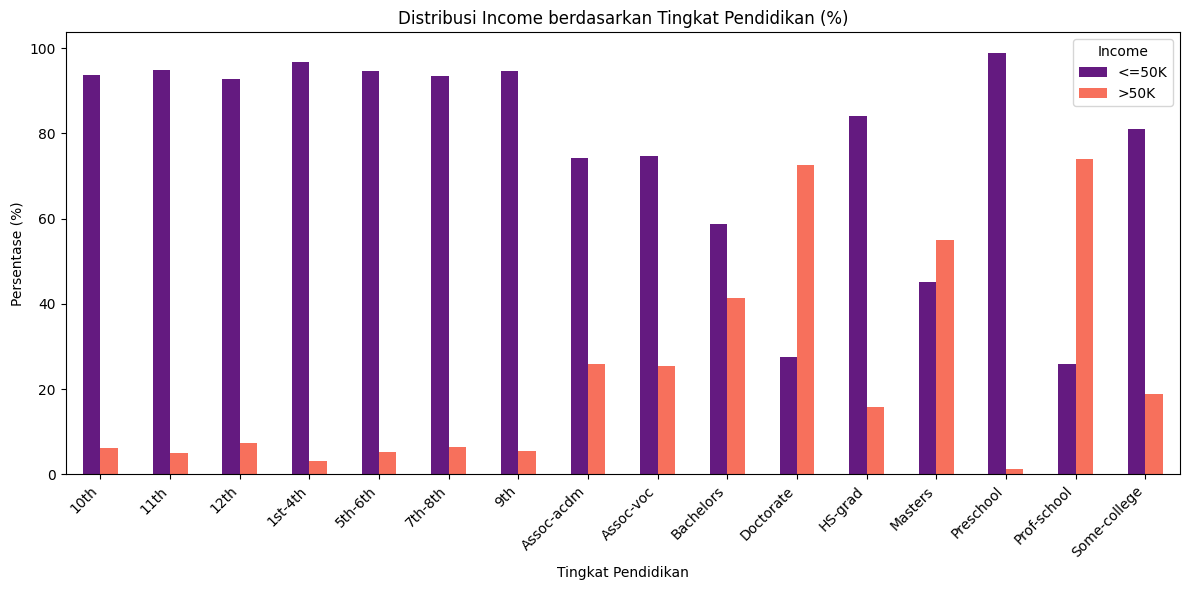

In [ ]:
palette_magma = [plt.cm.magma(0.3), plt.cm.magma(0.7)]
# Crosstab persentase
edu_income = pd.crosstab(
    df['Education'],
    df['Income'],
    normalize='index'
).mul(100)

# Plot grouped bar chart
edu_income.plot(
    kind='bar',
    figsize=(12,6),
    color=palette_magma
)

plt.title('Distribusi Income berdasarkan Tingkat Pendidikan (%)')
plt.ylabel('Persentase (%)')
plt.xlabel('Tingkat Pendidikan')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Income')
plt.tight_layout()
plt.show()


---

***Insight Distribusi Income berdasarkan Tingkat Pendidikan***

**Pendidikan Rendah (Preschool – 12th)**

* Hampir seluruh individu pada tingkat pendidikan rendah berada pada kategori **income ≤50K**.
* Proporsi **income >50K sangat kecil** (di bawah 10%).
* Hal ini menunjukkan keterbatasan peluang pendapatan tinggi pada tingkat pendidikan dasar dan menengah awal.

---

**Pendidikan Menengah (HS-grad, Some-college, Associate)**

* Mulai terlihat **peningkatan proporsi income >50K**, khususnya pada:

  * **Assoc-acdm**
  * **Assoc-voc**
* Namun, mayoritas individu masih berada pada kategori **≤50K**.
* Pendidikan menengah meningkatkan peluang pendapatan, tetapi belum dominan.

---

**Pendidikan Tinggi (Bachelors ke atas)**

* **Bachelors** menunjukkan distribusi yang lebih seimbang antara ≤50K dan >50K.
* **Masters, Doctorate, dan Prof-school** didominasi oleh individu dengan **income >50K**.
* **Doctorate dan Prof-school** memiliki proporsi income >50K paling tinggi dibandingkan tingkat pendidikan lainnya.

---

**Insight Utama**

> Terdapat hubungan yang sangat kuat antara tingkat pendidikan dan pendapatan. Semakin tinggi tingkat pendidikan, semakin besar proporsi individu dengan pendapatan di atas 50K. Pendidikan tinggi merupakan faktor yang paling konsisten dan signifikan dalam membedakan tingkat pendapatan.

---


In [ ]:
# Keterangan
# Divorced : Cerai
# Married-AF-spouse : Menikah dengan pasangan anggota Angkatan Bersenjata
# Married-civ-spouse : Menikah dengan pasangan sipil
# Married-spouse-absent : Menikah, tetapi pasangan tidak tinggal bersama / tidak hadir
# Never-married : Belum pernah menikah
# Separated : Pisah (belum resmi bercerai)
# Widowed : Janda / Duda

pd.crosstab(df['Marital Status'], df['Income'], normalize='index') * 100

Income,<=50K,>50K
Marital Status,,
Divorced,89.879336,10.120664
Married-AF-spouse,62.162162,37.837838
Married-civ-spouse,55.381727,44.618273
Married-spouse-absent,90.764331,9.235669
Never-married,95.446356,4.553644
Separated,93.529412,6.470588
Widowed,91.567852,8.432148


### **Distribusi income berdasarkan Marital Status**

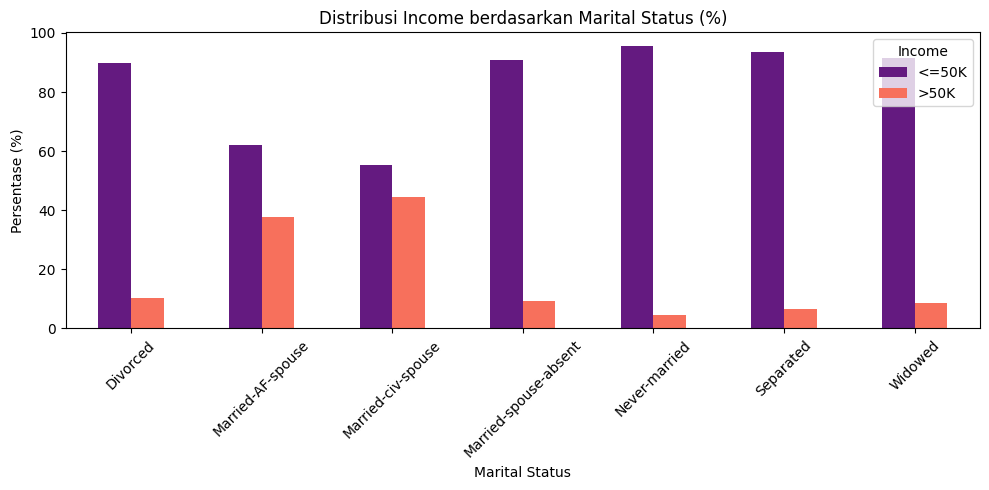

In [ ]:
palette_magma = [plt.cm.magma(0.3), plt.cm.magma(0.7)]
# Crosstab persentase
marital_income = pd.crosstab(
    df['Marital Status'],
    df['Income'],
    normalize='index'
).mul(100)

# Plot
marital_income.plot(
    kind='bar',
    figsize=(10,5),
    color=palette_magma
)

plt.title('Distribusi Income berdasarkan Marital Status (%)')
plt.ylabel('Persentase (%)')
plt.xlabel('Marital Status')
plt.xticks(rotation=45)
plt.legend(title='Income')
plt.tight_layout()
plt.show()


---

***Insight Distribusi Income berdasarkan Marital Status***

**Married-civ-spouse**

* Memiliki **proporsi income >50K tertinggi** dibandingkan status pernikahan lainnya.
* Hampir **setengah individu** dalam kategori ini berpenghasilan >50K.
* Menunjukkan bahwa individu yang menikah dengan pasangan sipil cenderung memiliki stabilitas ekonomi yang lebih baik.

---

**Married-AF-spouse**

* Proporsi income >50K juga relatif tinggi dibandingkan status lain selain married-civ-spouse.
* Menunjukkan bahwa status menikah, khususnya dengan pasangan yang bekerja (termasuk militer), berkorelasi dengan pendapatan yang lebih tinggi.

---

**Never-married**

* Didominasi oleh individu dengan **income ≤50K**.
* Proporsi income >50K sangat kecil.
* Mengindikasikan bahwa individu yang belum menikah cenderung berada pada tahap awal karier atau memiliki stabilitas ekonomi yang lebih rendah.

---

**Divorced, Separated, Widowed**

* Mayoritas individu dalam kelompok ini berada pada kategori **income ≤50K**.
* Proporsi income >50K relatif rendah dibandingkan kelompok menikah.
* Kondisi pernikahan yang tidak stabil berkorelasi dengan pendapatan yang lebih rendah.

---

**Married-spouse-absent**

* Hampir seluruh individu berada pada kategori **income ≤50K**.
* Menunjukkan bahwa status menikah tanpa kehadiran pasangan tidak memberikan keuntungan ekonomi yang signifikan.

---

**Insight Utama**

> Status pernikahan memiliki hubungan yang jelas dengan tingkat pendapatan. Individu yang menikah, khususnya **married-civ-spouse**, memiliki peluang lebih besar untuk memperoleh pendapatan di atas 50K dibandingkan individu yang belum menikah atau berada dalam kondisi pernikahan yang tidak stabil.

---


In [ ]:
pd.crosstab(df['Gender'], df['Income'], normalize='index') * 100

Income,<=50K,>50K
Gender,,
Female,89.068100,10.931900
Male,69.610788,30.389212


---
>**Kesimpulan**
- Pendidikan tinggi berpeluang pendapatan >50K
- Married-civ-spouse dominan di >50K
- Gender bias (male > female di >50K)
---

### **Distribusi Income Berdasarkan Gender**

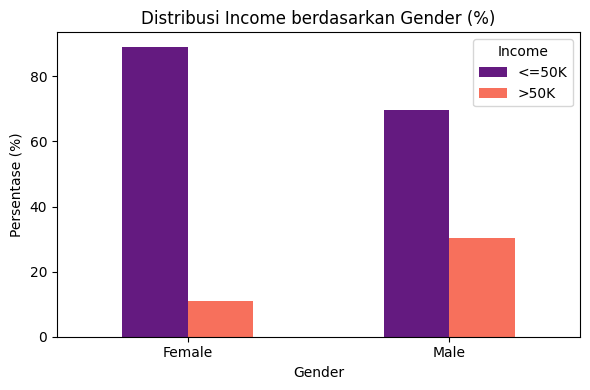

In [ ]:
palette_magma = [plt.cm.magma(0.3), plt.cm.magma(0.7)]
gender_income = pd.crosstab(
    df['Gender'],
    df['Income'],
    normalize='index'
).mul(100)

gender_income.plot(
    kind='bar',
    figsize=(6,4),
    color=palette_magma
)

plt.title('Distribusi Income berdasarkan Gender (%)')
plt.ylabel('Persentase (%)')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.legend(title='Income')
plt.tight_layout()
plt.show()




---

***Insight Distribusi Income berdasarkan Gender***

**Female**

* Mayoritas perempuan berada pada kategori **income ≤50K**.
* Proporsi perempuan dengan **income >50K relatif kecil** (sekitar 10–12%).
* Mengindikasikan bahwa perempuan dalam dataset ini cenderung memiliki pendapatan yang lebih rendah dibandingkan laki-laki.

---

**Male**

* Proporsi laki-laki dengan **income >50K jauh lebih tinggi** dibandingkan perempuan.
* Sekitar **30% laki-laki** berada pada kategori income >50K.
* Menunjukkan adanya kecenderungan laki-laki lebih sering berada pada kelompok pendapatan tinggi.

---

 **Insight Utama**

> Terdapat perbedaan yang jelas antara gender terhadap tingkat pendapatan. Laki-laki memiliki peluang yang jauh lebih besar untuk memperoleh income >50K dibandingkan perempuan, menunjukkan adanya **gender income gap** dalam dataset ini.

---



### **Distribusi Income berdasarkan Kelompok Umur**

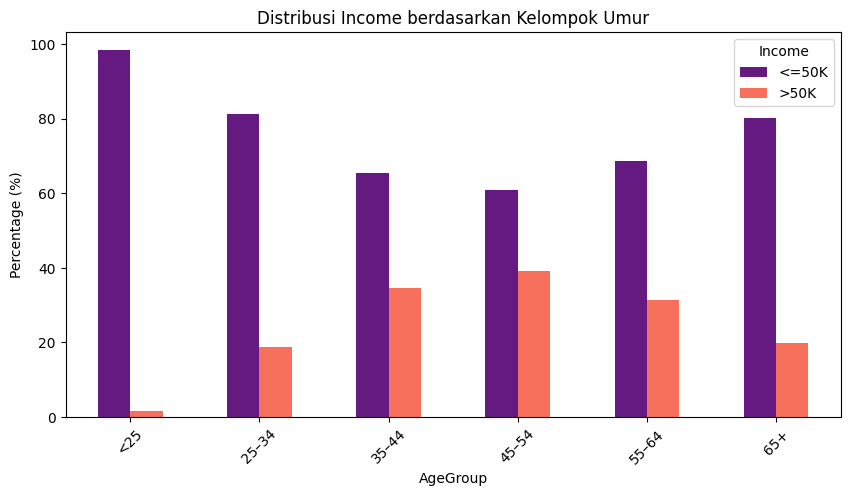

In [ ]:
palette_magma = [plt.cm.magma(0.3), plt.cm.magma(0.7)]
df['AgeGroup'] = pd.cut(
    df['Age'],
    bins=[0,25,35,45,55,65,100],
    labels=['<25','25–34','35–44','45–54','55–64','65+'],
)

pd.crosstab(
    df['AgeGroup'],
    df['Income'],
    normalize='index'
).mul(100).plot(kind='bar', figsize=(10,5), color=palette_magma)

plt.title('Distribusi Income berdasarkan Kelompok Umur')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.show()



---

***Insight Distribusi Income berdasarkan Kelompok Usia***

**Usia < 25 tahun**

* Hampir seluruh individu berada pada kategori **income ≤50K**.
* Proporsi income >50K **sangat kecil**.
* Wajar karena kelompok ini umumnya masih di awal karier atau belum memiliki pengalaman kerja yang panjang.

---

**Usia 25–34 tahun**

* Mulai terlihat **kenaikan proporsi income >50K**, meskipun masih didominasi oleh ≤50K.
* Menunjukkan fase **awal pertumbuhan karier**, di mana sebagian individu mulai mencapai pendapatan lebih tinggi.

---

**Usia 35–44 tahun**

* Proporsi income >50K meningkat cukup signifikan.
* Kelompok usia ini menunjukkan **transisi kuat menuju pendapatan menengah–tinggi**.
* Umumnya berada pada fase karier yang lebih stabil dan produktif.

---

**Usia 45–54 tahun**

* Merupakan **kelompok usia dengan proporsi income >50K tertinggi**.
* Menunjukkan puncak produktivitas dan posisi karier (senior/managerial level).

---

**Usia 55–64 tahun**

* Proporsi income >50K mulai **menurun**, meskipun masih relatif tinggi.
* Bisa mengindikasikan transisi menuju pensiun atau pengurangan jam kerja.

---

**Usia ≥ 65 tahun**

* Kembali didominasi oleh **income ≤50K**.
* Mengindikasikan sebagian besar individu sudah tidak berada pada puncak karier aktif.

---

**Insight Utama**

> Peluang memperoleh income >50K meningkat seiring bertambahnya usia hingga mencapai puncak pada kelompok usia **45–54 tahun**, kemudian menurun pada usia lanjut. Usia memiliki pola **non-linear** terhadap income.

---


### **Distribusi Income berdasarkan Workclass**

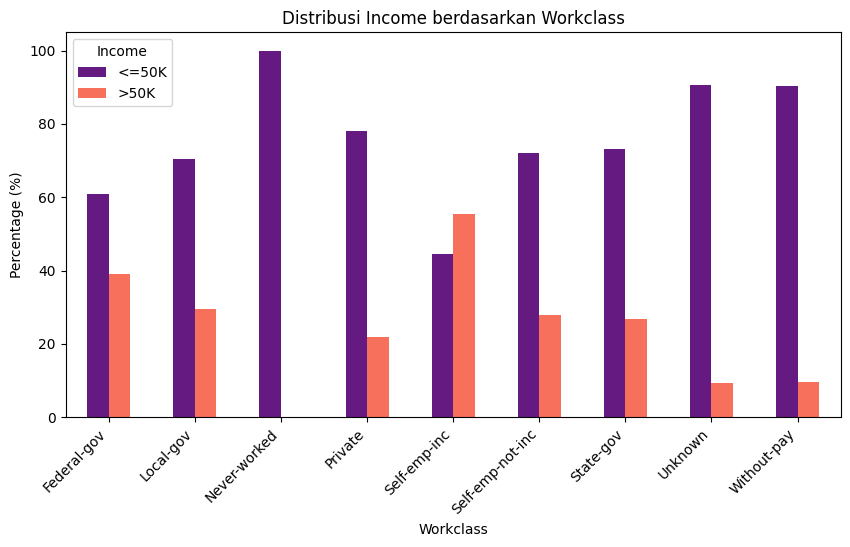

In [ ]:
palette_magma = [plt.cm.magma(0.3), plt.cm.magma(0.7)]
pd.crosstab(
    df['Workclass'],
    df['Income'],
    normalize='index'
).mul(100).plot(kind='bar', figsize=(10,5), color= palette_magma)

plt.title('Distribusi Income berdasarkan Workclass')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45, ha='right')
plt.show()


---

***Insight Distribusi Income berdasarkan Workclass***

**Self-emp-inc (Wiraswasta dengan badan usaha)**

* Memiliki **proporsi income >50K tertinggi** dibanding workclass lain.
* Menunjukkan bahwa kepemilikan usaha berbadan hukum berkorelasi dengan pendapatan tinggi.
* Kelompok ini berpotensi memiliki **kontrol lebih besar terhadap sumber pendapatan**.

---

**Federal-gov & Local-gov**

* Menunjukkan proporsi income >50K yang **relatif tinggi dan stabil**.
* Mengindikasikan bahwa pekerjaan pemerintahan cenderung memberikan **keamanan dan struktur gaji yang lebih baik**.

---

**Private**

* Merupakan workclass dengan jumlah individu terbesar, namun **didominasi income ≤50K**.
* Meski ada individu berpendapatan tinggi, secara proporsi masih kalah dibanding self-employed atau federal government.
* Menggambarkan **ketimpangan pendapatan di sektor swasta**.

---

**Self-emp-not-inc**

* Proporsi income >50K **lebih rendah dibanding self-emp-inc**.
* Menunjukkan bahwa wiraswasta tanpa badan usaha memiliki **risiko pendapatan lebih besar**.

---

**Never-worked & Without-pay**

* Hampir **100% berada pada income ≤50K**.
* Secara logis tidak berkontribusi pada pendapatan tinggi.
* Perlu dipertimbangkan untuk:

  * digabungkan
  * atau diperlakukan sebagai kategori khusus saat modeling

---

**Unknown**

* Didominasi oleh income ≤50K.
* Kemungkinan mencerminkan:

  * data tidak lengkap
  * pekerjaan informal

---

 **Insight Utama**

> Workclass memiliki pengaruh kuat terhadap income. Individu yang bekerja sebagai **self-employed dengan badan usaha** atau di **sektor pemerintahan** memiliki peluang lebih besar untuk memperoleh income >50K dibandingkan pekerja sektor swasta atau informal.

---


### **Distribusi Income berdasarkan Capital Gain**

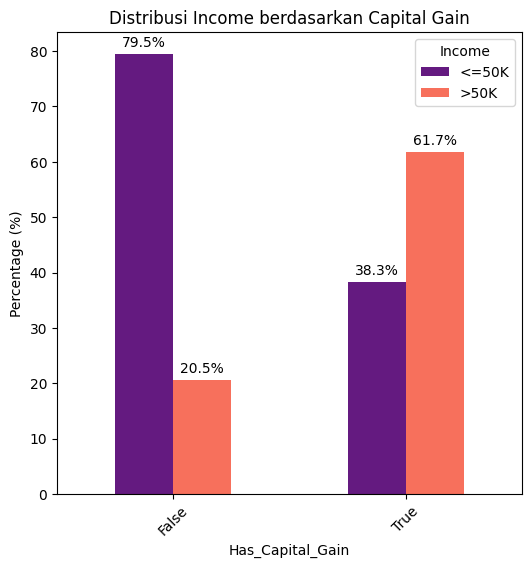

In [ ]:
palette_magma = [plt.cm.magma(0.3), plt.cm.magma(0.7)]
df['Has_Capital_Gain'] = (df['Capital Gain'] > 0).astype(int)
ct= pd.crosstab(
    df['Has_Capital_Gain'],
    df['Income'],
    normalize='index'
).mul(100).plot(kind='bar',
                figsize=(6,6),
                color= palette_magma)

for container in ct.containers:
    ct.bar_label(
        container,
        fmt='%.1f%%',
        label_type='edge',
        padding=3
    )
plt.title('Distribusi Income berdasarkan Capital Gain')
plt.ylabel('Percentage (%)')
ct.set_xticklabels(['False', 'True'])
plt.xticks(rotation=45)
plt.show()

Insight: *Income Distribution by Capital Gain Presence*

1. Perbedaan pendapatan sangat kontras

* **Individu tanpa capital gain (False)**:

  * **79.5%** berpenghasilan **≤50K**
  * Hanya **20.5%** yang berpenghasilan **>50K**

* **Individu dengan capital gain (True)**:

  * **61.7%** berpenghasilan **>50K**
  * Hanya **38.3%** yang berpenghasilan **≤50K**

 Terjadi **pembalikan distribusi** ketika capital gain ada.

---

2. Capital Gain adalah indikator kuat income tinggi

* Kehadiran **capital gain** meningkatkan peluang income **>50K hampir 3× lipat**
* Artinya, individu dengan investasi/aset yang menghasilkan capital gain **jauh lebih mungkin berada pada kelompok pendapatan tinggi**

---

3. Insight bisnis / sosial

> Capital gain mencerminkan kepemilikan aset dan aktivitas investasi, yang berkorelasi kuat dengan tingkat kesejahteraan dan pendapatan individu.

---


### **Distribusi Income berdasarkan Capital Loss**

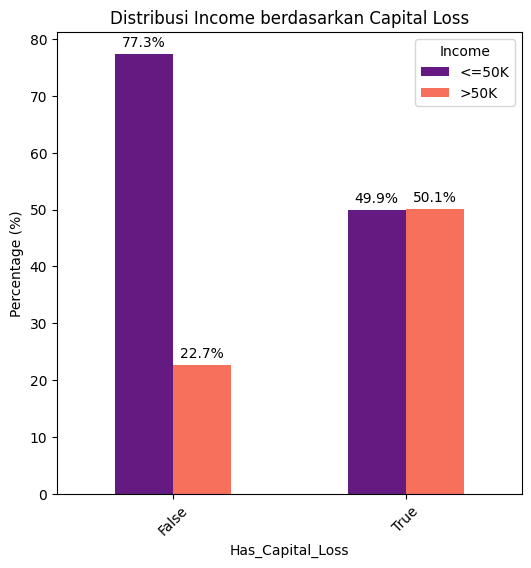

In [ ]:
palette_magma = [plt.cm.magma(0.3), plt.cm.magma(0.7)]
df['Has_Capital_Loss'] = (df['capital loss'] > 0).astype(int)
ct1= pd.crosstab(
    df['Has_Capital_Loss'],
    df['Income'],
    normalize='index'
).mul(100).plot(kind='bar',
                figsize=(6,6),
                color= palette_magma)

for container in ct1.containers:
    ct1.bar_label(
        container,
        fmt='%.1f%%',
        label_type='edge',
        padding=3
    )
plt.title('Distribusi Income berdasarkan Capital Loss')
plt.ylabel('Percentage (%)')
ct1.set_xticklabels(['False', 'True'])
plt.xticks(rotation=45)
plt.show()

 Insight: *Income Distribution by Capital Loss Presence*

1. **Mayoritas individu tidak memiliki capital loss**

   * Pada kategori **Has_Capital_Loss = False**, sekitar **77,3%** individu berpendapatan **≤50K** dan hanya **22,7%** yang **>50K**.
   * Ini menunjukkan bahwa **tanpa capital loss**, kemungkinan besar individu berada di kelompok pendapatan rendah–menengah.

2. **Capital loss menjadi pembeda yang sangat kuat**

   * Pada kategori **Has_Capital_Loss = True**, proporsinya hampir **seimbang**:

     * **49,9% ≤50K**
     * **50,1% >50K**
   * Artinya, individu yang mengalami capital loss **memiliki peluang jauh lebih besar** untuk berada di kelompok pendapatan **>50K** dibandingkan yang tidak mengalami capital loss.

3. **Perubahan distribusi sangat signifikan**

   * Dari dominasi ≤50K (77,3%) saat **tanpa capital loss**
   * Menjadi hampir **50:50** saat **ada capital loss**
   * Ini adalah lonjakan probabilitas yang besar dan tidak terjadi secara kebetulan.

---

Analisis

* **Capital loss umumnya terkait dengan aktivitas investasi**, seperti saham, properti, atau bisnis.
* Individu yang memiliki capital loss:

  * Cenderung **sudah memiliki aset**
  * Memiliki **eksposur ke instrumen finansial**
  * Biasanya berasal dari **kelompok ekonomi menengah ke atas**
* Oleh karena itu, meskipun mengalami kerugian (loss), **pendapatan tahunan mereka tetap relatif tinggi**.

---

Kesimpulan

> **Keberadaan capital loss secara drastis meningkatkan peluang individu masuk ke kelompok pendapatan >50K**, meskipun secara logika terlihat sebagai “kerugian”. Dalam konteks data, capital loss justru mencerminkan **kapasitas ekonomi dan aktivitas investasi**, bukan kondisi finansial buruk.


# **4. Feature Engineering**

In [ ]:
# Membersihkan spasi, tanda baca pada target, dan menangani missing values
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].str.strip()

if df['Income'].dtype == 'object':
    df['Income'] = df['Income'].str.replace('.', '', regex=False)

df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)

print(f"Pembersihan awal selesai. Jumlah data setelah cleaning: {df.shape[0]} baris.")

Pembersihan awal selesai. Jumlah data setelah cleaning: 48812 baris.


In [ ]:
# Transformasi fitur numerik ke biner dan pembersihan kolom redundan
df['Has_Capital_Gain'] = (df['Capital Gain'] > 0).astype(int)
df['Has_Capital_Loss'] = (df['capital loss'] > 0).astype(int)

df.drop(['Education', 'AgeGroup'], axis=1, errors='ignore', inplace=True)

if df['Income'].dtype == 'object':
    df['Income'] = df['Income'].map({'<=50K': 0, '>50K': 1})

print("Transformasi fitur dan mapping target Income selesai.")

Transformasi fitur dan mapping target Income selesai.


In [ ]:
# Transformasi variabel kategori menjadi numerik menggunakan One-Hot Encoding
df_final = pd.get_dummies(df, drop_first=True)

print("Informasi Dataframe Final (Siap Modeling):")
df_final.info()

Informasi Dataframe Final (Siap Modeling):
<class 'pandas.core.frame.DataFrame'>
Index: 48812 entries, 0 to 16279
Data columns (total 49 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   Age                                   48812 non-null  int64
 1   Final Weight                          48812 non-null  int64
 2   EducationNum                          48812 non-null  int64
 3   Capital Gain                          48812 non-null  int64
 4   capital loss                          48812 non-null  int64
 5   Hours per Week                        48812 non-null  int64
 6   Income                                48812 non-null  int64
 7   Has_Capital_Gain                      48812 non-null  int64
 8   Has_Capital_Loss                      48812 non-null  int64
 9   Workclass_Local-gov                   48812 non-null  bool 
 10  Workclass_Never-worked                48812 non-null  bool 
 11  Wor

## Train Test Split

In [ ]:
# Memisahkan fitur dan target serta membagi dataset menjadi data latih dan data uji
X = df_final.drop(columns=['Income'])
y = df_final['Income']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Data Berhasil Dipisah:")
print(f"Jumlah Data Training: {X_train.shape[0]} baris")
print(f"Jumlah Data Testing : {X_test.shape[0]} baris")

Data Berhasil Dipisah:
Jumlah Data Training: 39049 baris
Jumlah Data Testing : 9763 baris


In [ ]:
from google.colab import files

# 1. Kita ambil sampel acak 200 baris dari X_test yang sudah kamu buat di atas
# (Kita pakai 200 saja agar file-nya kecil dan loading Streamlit cepat)
df_sample = X_test.sample(n=200, random_state=42)

# 2. Simpan sampel tersebut menjadi file CSV
df_sample.to_csv("X_sample.csv", index=False)

# 3. Download file tersebut ke komputer kamu otomatis
files.download("X_sample.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Tunning

In [ ]:
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200]
}

# Proses mencari setelan terbaik
grid_search = GridSearchCV(estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
                           param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Simpan model terbaik ke dalam variabel
best_xgb = grid_search.best_estimator_

##Model Training/Comparison

In [ ]:
# Inisialisasi berbagai model klasifikasi dengan parameter standar
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "XGBoost": best_xgb,
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Melatih setiap model secara berurutan menggunakan data training
print("Proses pelatihan model sedang berjalan...")
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"Model {name} berhasil dilatih.")

print("\nSeluruh model siap untuk masuk ke tahap evaluasi.")

Proses pelatihan model sedang berjalan...
Model Random Forest berhasil dilatih.
Model Logistic Regression berhasil dilatih.
Model Decision Tree berhasil dilatih.
Model XGBoost berhasil dilatih.
Model Gradient Boosting berhasil dilatih.

Seluruh model siap untuk masuk ke tahap evaluasi.


##Evaluate Performa Model

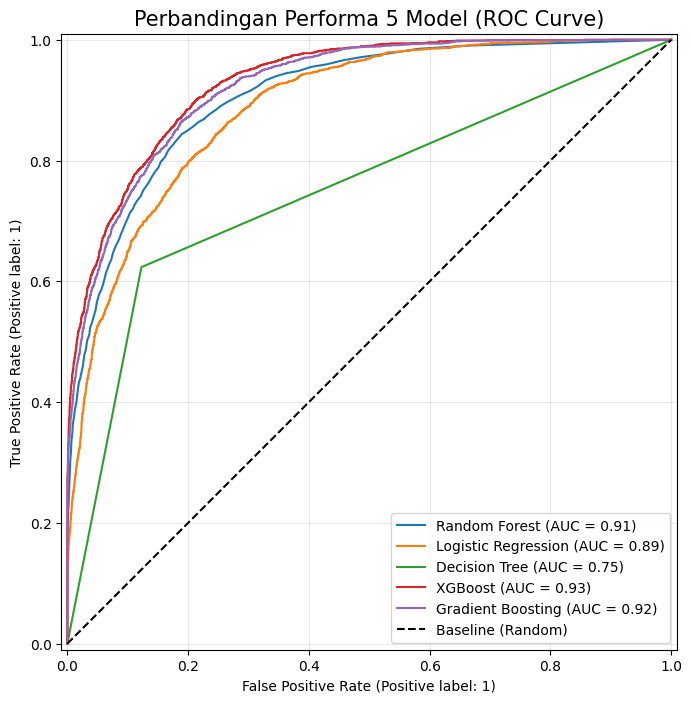

In [ ]:
# Visualisasi perbandingan kemampuan klasifikasi setiap model
fig, ax = plt.subplots(figsize=(12, 8))

for name, model in models.items():
    RocCurveDisplay.from_estimator(model, X_test, y_test, ax=ax, name=name)

plt.plot([0, 1], [0, 1], 'k--', label='Baseline (Random)')
plt.title('Perbandingan Performa 5 Model (ROC Curve)', fontsize=15)
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.show()

**Performa Model Terbaik (Setelah Tuning)**

Setelah melalui proses Hyperparameter Tuning menggunakan GridSearchCV, model XGBoost terpilih sebagai model final dengan performa yang sudah dioptimalkan.

*  **Akurasi & ROC-AUC:** Model mencapai akurasi 87% dengan skor ROC-AUC 0.9292, yang menunjukkan kemampuan luar biasa dalam membedakan antara masyarakat berpenghasilan tinggi dan rendah.

*  **Stabilitas:** Penggunaan regularisasi internal pada XGBoost memastikan model tetap konsisten (tidak overfitting) saat menghadapi data baru.

In [ ]:
# Menampilkan metrik evaluasi detail untuk setiap model
for name, model in models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print(f"\n" + "="*50)
    print(f"LAPORAN KLASIFIKASI: {name}")
    print("="*50)
    print(classification_report(y_test, y_pred))
    print(f"Skor ROC-AUC: {roc_auc_score(y_test, y_proba):.4f}")


LAPORAN KLASIFIKASI: Random Forest
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      7426
           1       0.75      0.62      0.68      2337

    accuracy                           0.86      9763
   macro avg       0.82      0.78      0.79      9763
weighted avg       0.85      0.86      0.85      9763

Skor ROC-AUC: 0.9071

LAPORAN KLASIFIKASI: Logistic Regression
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      7426
           1       0.72      0.58      0.64      2337

    accuracy                           0.84      9763
   macro avg       0.80      0.75      0.77      9763
weighted avg       0.84      0.84      0.84      9763

Skor ROC-AUC: 0.8887

LAPORAN KLASIFIKASI: Decision Tree
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      7426
           1       0.62      0.62      0.62      2337

    accuracy              

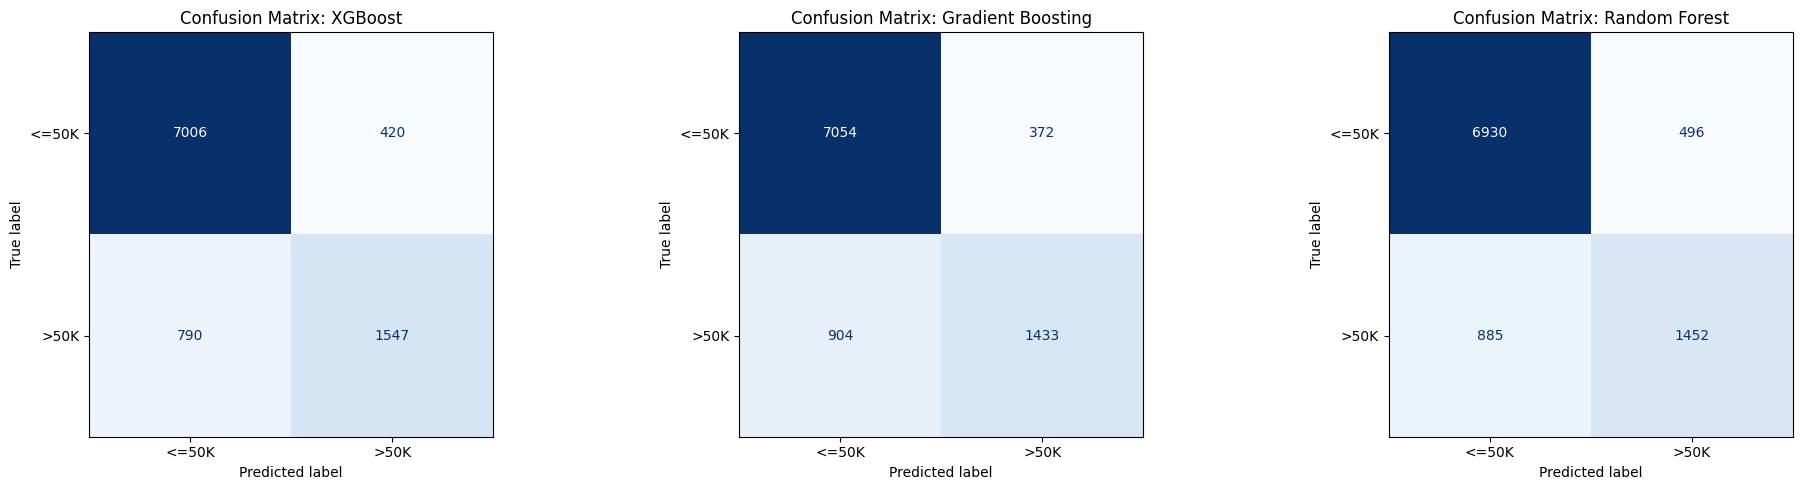

In [ ]:

# Visualisasi perbandingan prediksi benar vs salah untuk 3 model terbaik
top_models = {
    "XGBoost": models["XGBoost"],
    "Gradient Boosting": models["Gradient Boosting"],
    "Random Forest": models["Random Forest"]
}

fig, axes = plt.subplots(1, 3, figsize=(20, 5))

for i, (name, model) in enumerate(top_models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['<=50K', '>50K'])
    disp.plot(ax=axes[i], cmap='Blues', colorbar=False)
    axes[i].set_title(f"Confusion Matrix: {name}")

plt.tight_layout()
plt.show()

**Analisis Strategis Confusion Matrix (FP vs FN)**

Berikut adalah analisis risiko kesalahan model:

* **False Positive (FP):** Model memprediksi seseorang berpendapatan >50K padahal aslinya <=50K.

* **Dampak Kerugian:** Jika model ini digunakan untuk target pemasaran kartu kredit premium atau pinjaman besar, perusahaan berisiko memberikan fasilitas kepada orang yang tidak memiliki kapasitas bayar yang cukup (risiko kredit/gagal bayar).

* False Negative (FN): Model memprediksi seseorang berpendapatan <=50K padahal aslinya >50K.

* **Dampak Kerugian:** Ini adalah opportunity loss. Perusahaan kehilangan calon nasabah potensial yang seharusnya bisa mendatangkan keuntungan besar hanya karena salah klasifikasi sebagai "orang biasa".

**Evaluasi:** XGBoost dipilih karena berhasil meminimalkan kedua error ini secara seimbang, memberikan Recall yang lebih baik (0.66) dibandingkan model lain, sehingga risiko kehilangan nasabah potensial (FN) dapat ditekan.


In [ ]:
# Membuat ringkasan metrik untuk seluruh model ke dalam satu tabel
summary_data = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    report = classification_report(y_test, y_pred, output_dict=True)
    summary_data.append({
        "Model": name,
        "Accuracy": report['accuracy'],
        "Precision (>50K)": report['1']['precision'],
        "Recall (>50K)": report['1']['recall'],
        "F1-Score (>50K)": report['1']['f1-score'],
        "ROC-AUC": roc_auc_score(y_test, y_proba)
    })

# Menampilkan tabel peringkat model berdasarkan skor ROC-AUC tertinggi
df_summary = pd.DataFrame(summary_data).sort_values(by="ROC-AUC", ascending=False)
display(df_summary)

,Model,Accuracy,Precision (>50K),Recall (>50K),F1-Score (>50K),ROC-AUC
3,XGBoost,0.876063,0.786477,0.661960,0.718866,0.930432
4,Gradient Boosting,0.869302,0.793906,0.613179,0.691936,0.923371
0,Random Forest,0.858548,0.745380,0.621309,0.677713,0.907077
1,Logistic Regression,0.844208,0.717484,0.575952,0.638975,0.888714
2,Decision Tree,0.816552,0.615287,0.623449,0.619341,0.750386


Menampilkan pengaruh fitur secara keseluruhan (Global):


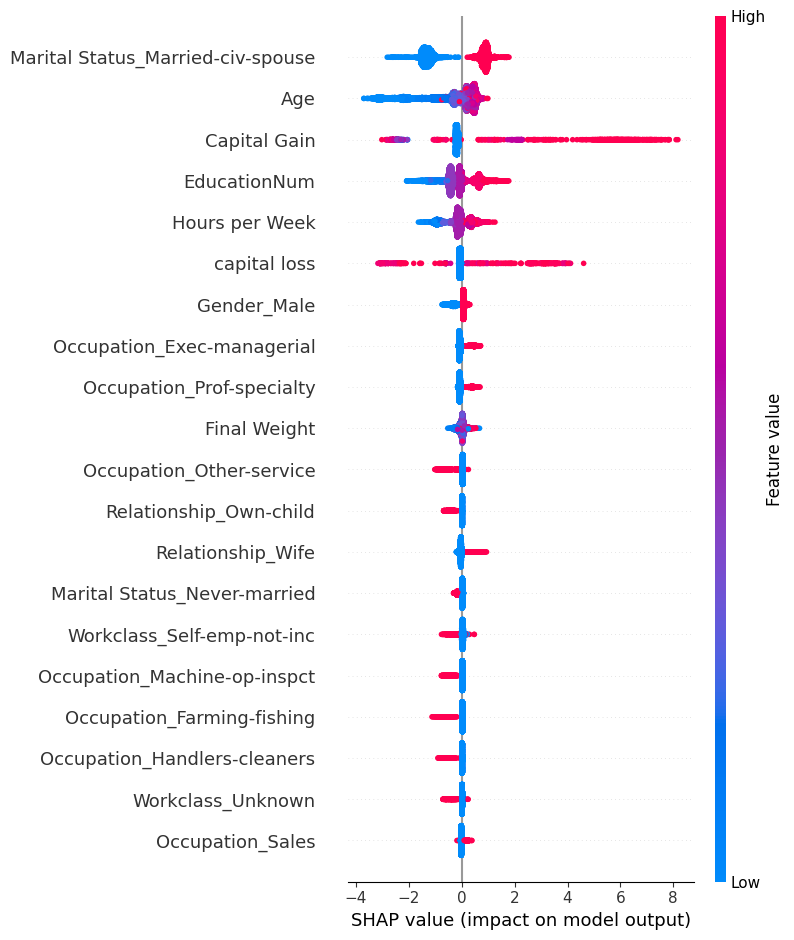


Analisis prediksi untuk satu orang spesifik (Local):

Contoh Prediksi Income <=50K (Baris ke-0)


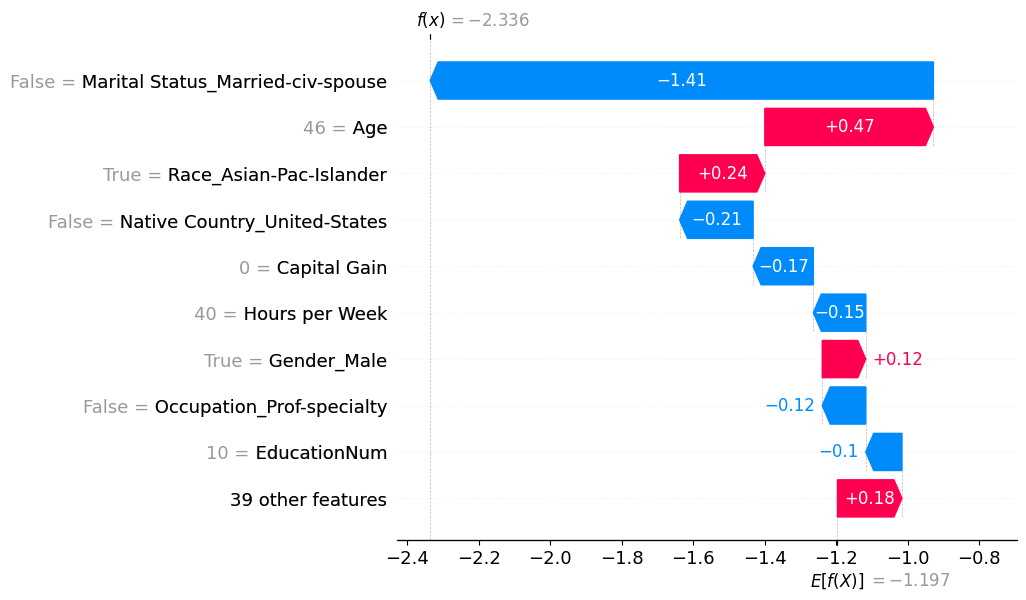


Contoh Prediksi Income >50K (Baris ke-3)


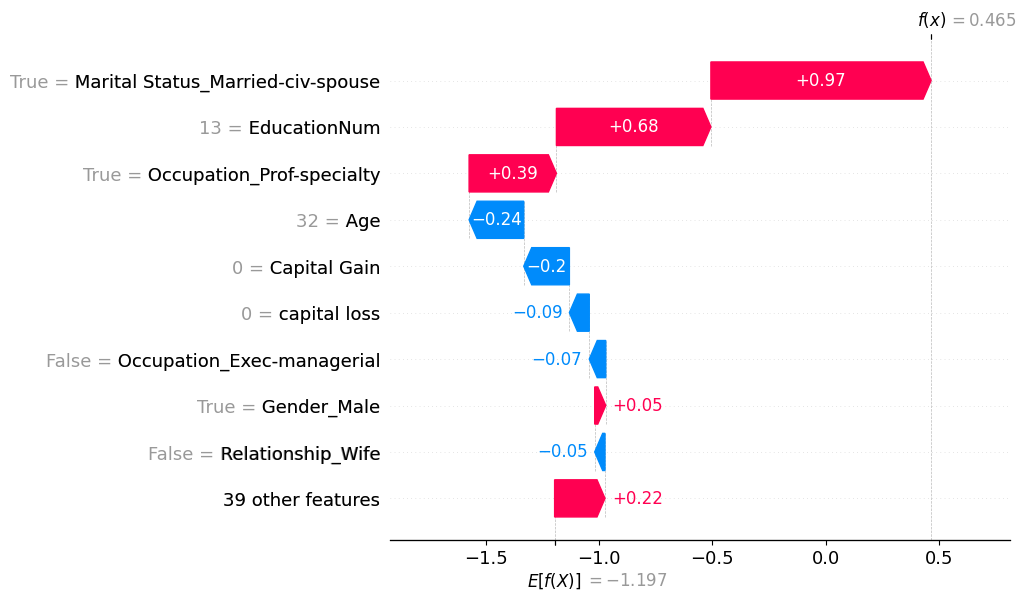

In [ ]:
import shap

# XGBoost models tuning
model_untuk_shap = models["XGBoost"]

# 1. Menyiapkan Explainer dan Kalkulasi
explainer = shap.TreeExplainer(model_untuk_shap)
shap_values = explainer.shap_values(X_test)
explanation = explainer(X_test) # Ini diperlukan untuk plot waterfall

# 2. SHAP GLOBAL
print("Menampilkan pengaruh fitur secara keseluruhan (Global):")
shap.summary_plot(shap_values, X_test)

# 3. SHAP LOCAL
print("\nAnalisis prediksi untuk satu orang spesifik (Local):")

# 1. Cari indeks pertama yang diprediksi <=50K dan >50K
idx_rendah = (models["XGBoost"].predict(X_test) == 0).argmax()
idx_tinggi = (models["XGBoost"].predict(X_test) == 1).argmax()

sampel_analisis = [
    ("Contoh Prediksi Income <=50K", idx_rendah),
    ("Contoh Prediksi Income >50K", idx_tinggi)
]

# 2. Loop untuk menampilkan keduanya
for judul, idx in sampel_analisis:
    print(f"\n{'='*20}")
    print(f"{judul} (Baris ke-{idx})")
    print(f"{'='*20}")
    shap.plots.waterfall(explanation[idx], max_display=10)

**Interpretasi Model dengan SHAP (Global & Local)**

Untuk memahami "logika" di balik keputusan model, kami menggunakan dua tingkat analisis SHAP:

* **Analisis SHAP Global (Keseluruhan):** Secara keseluruhan, fitur yang paling menentukan tingkat pendapatan seseorang adalah Age (Usia), Capital Gain, dan Education Num (Lama Pendidikan). Hal ini sangat masuk akal secara sosiologis, di mana kematangan usia, aset investasi, dan tingkat pendidikan formal merupakan pendorong utama kesejahteraan ekonomi di dataset ini.

* **Analisis SHAP Local (Individu):** Melalui Waterfall Plot, kami membedah dua profil kontras:

* **Profil Income >50K:** Model memberikan prediksi tinggi karena didorong kuat
oleh faktor Relationship (Married) dan jam kerja (Hours per week) yang stabil.

* **Profil Income <=50K:** Model memberikan prediksi rendah meskipun subjek sudah berusia produktif, biasanya karena ditarik turun oleh faktor Marital Status (Never-married) atau Occupation yang memiliki basis gaji rendah di dataset ini.

##Feature Importance

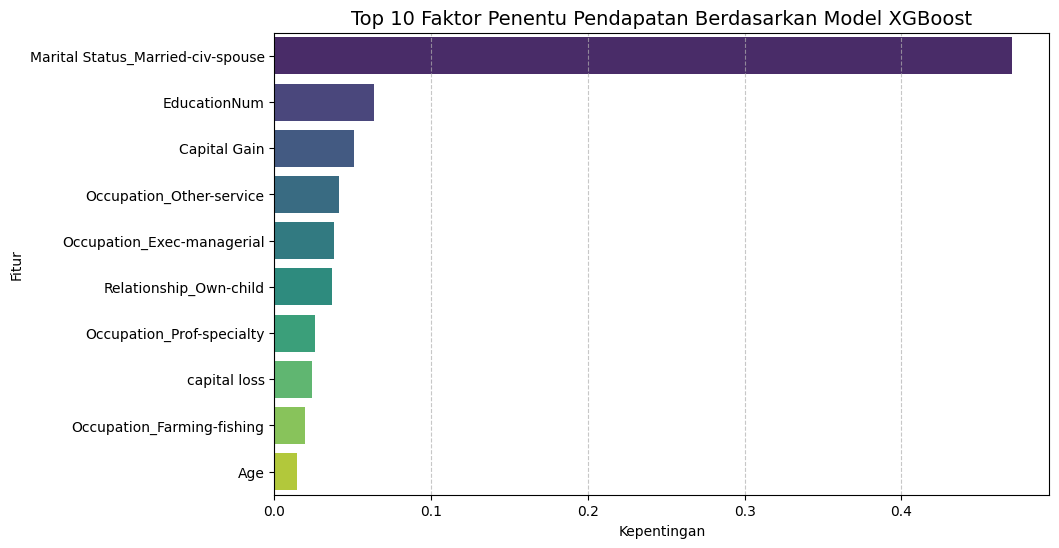

In [ ]:
# Mengambil tingkat kepentingan fitur dari model terbaik (XGBoost)
importances = models["XGBoost"].feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Fitur': feature_names, 'Kepentingan': importances})
feature_importance_df = feature_importance_df.sort_values(by='Kepentingan', ascending=False).head(10)

# Visualisasi 10 Fitur Teratas
plt.figure(figsize=(10, 6))
sns.barplot(x='Kepentingan', y='Fitur', data=feature_importance_df, palette='viridis')
plt.title('Top 10 Faktor Penentu Pendapatan Berdasarkan Model XGBoost', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

### **Analisis Insight: Mengapa Marital Status Menjadi Faktor Terkuat?**

Berdasarkan grafik Feature Importance dari model terbaik (XGBoost), variabel Marital Status (khususnya kategori Married-civ-spouse) muncul sebagai prediktor paling berpengaruh, mengungguli tingkat pendidikan (EducationNum). Berikut adalah analisis penyebabnya:

1. **Indikator Senioritas & Stabilitas (Proxy):** Dalam dataset ini, status pernikahan bertindak sebagai variabel pengganti (proxy) untuk usia matang dan stabilitas karier. Individu yang sudah menikah umumnya berada pada rentang usia produktif puncak dengan pengalaman kerja yang lebih lama, yang secara langsung berkorelasi dengan jabatan dan gaji yang lebih tinggi.

2. **Pembeda Kelas yang Kontras:** Secara statistik, kelompok Married-civ-spouse memiliki proporsi pendapatan >50K yang jauh lebih besar dibandingkan kelompok status lainnya (seperti Never-married atau Divorced). Perbedaan kontras ini memudahkan algoritma untuk memisahkan data dengan tingkat kesalahan yang rendah.

3. **Faktor Pendidikan vs. Pengalaman:** Meskipun EducationNum penting, pendidikan tinggi tanpa disertai senioritas (misal: lulusan baru) belum tentu menghasilkan pendapatan >50K. Sebaliknya, senioritas yang tercermin dalam status pernikahan sering kali memberikan bobot lebih besar dalam menentukan skala pendapatan di industri.

**Kesimpulan Insight:** Variabel demografi seperti Marital Status dan Age bekerja secara sinergis dengan variabel kualifikasi seperti EducationNum dan Capital Gain. Model XGBoost berhasil menangkap bahwa kombinasi antara kematangan usia/stabilitas dan tingkat pendidikan adalah formula utama yang menentukan profil pendapatan tinggi dalam populasi ini.

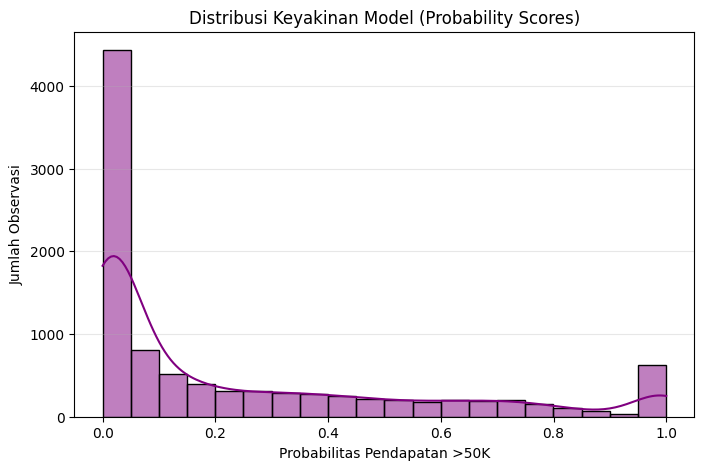

In [ ]:
# Menganalisis distribusi probabilitas untuk melihat tingkat keyakinan model
y_proba = models["XGBoost"].predict_proba(X_test)[:, 1]

plt.figure(figsize=(8,5))
sns.histplot(y_proba, bins=20, kde=True, color='purple')
plt.title('Distribusi Keyakinan Model (Probability Scores)')
plt.xlabel('Probabilitas Pendapatan >50K')
plt.ylabel('Jumlah Observasi')
plt.grid(axis='y', alpha=0.3)
plt.show()

### **Analisis Distribusi Probabilitas:**

1. D**ominasi Probabilitas Rendah:** Grafik menunjukkan penumpukan data yang sangat tinggi di area 0.0 - 0.2. Ini menandakan model memiliki keyakinan yang sangat kuat saat mengklasifikasikan individu berpendapatan <=50K.

2. **Karakteristik Model "Tegas":** Rendahnya frekuensi data di area tengah (0.4 - 0.6) menunjukkan bahwa model jarang mengalami ambiguitas atau keraguan dalam memisahkan kedua kelas pendapatan. Model secara tegas mampu membedakan profil mayoritas.

3. **Ekor Probabilitas Tinggi:** Distribusi pada area >0.8 jauh lebih rendah dan tersebar. Hal ini mencerminkan kondisi imbalanced data, di mana model memiliki lebih sedikit sampel untuk mempelajari pola "sangat yakin" pada kelompok pendapatan tinggi, namun tetap mampu memberikan probabilitas yang akurat bagi mereka yang memiliki fitur ekonomi kuat.

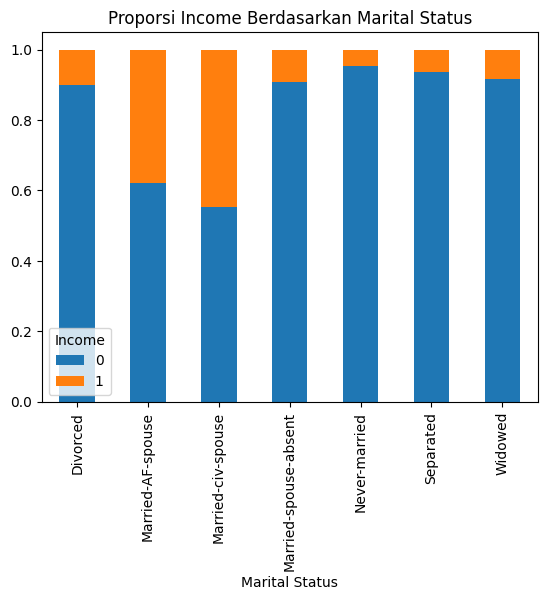

In [ ]:
pd.crosstab(df['Marital Status'], df['Income'], normalize='index').plot(kind='bar', stacked=True)
plt.title('Proporsi Income Berdasarkan Marital Status')
plt.show()

*Berdasarkan analisis proporsi, variabel Marital Status menunjukkan perbedaan distribusi yang paling ekstrem. Kelompok Married-civ-spouse memiliki rasio pendapatan >50K yang secara signifikan lebih besar dibandingkan kelompok status lainnya. Hal inilah yang menyebabkan model memberikan bobot kepentingan (Feature Importance) tertinggi pada variabel ini, karena ia berfungsi sebagai indikator senioritas dan stabilitas ekonomi dalam populasi ini.*

In [ ]:
# Memilih 3 sampel acak dari data uji untuk simulasi
sample_indices = X_test.sample(3, random_state=42).index
samples_to_predict = X_test.loc[sample_indices]

# Mengambil data mentah (sebelum encoding) untuk menampilkan identitas profil
raw_info = df.loc[sample_indices].drop(columns=['Income'])

# Proses Prediksi
predictions = models["XGBoost"].predict(samples_to_predict)
probabilities = models["XGBoost"].predict_proba(samples_to_predict)[:, 1]

print("=== SIMULASI PREDIKSI DATA BARU ===\n")

for i in range(len(sample_indices)):
    print(f"PROFIL SAMPEL #{i+1}:")
    display(raw_info.iloc[[i]]) # Menampilkan tabel data mentah yang mudah dibaca

    hasil = ">50K" if predictions[i] == 1 else "<=50K"
    print(f"HASIL PREDIKSI : {hasil}")
    print(f"TINGKAT KEYAKINAN : {probabilities[i]*100:.2f}%")
    print("-" * 50)

=== SIMULASI PREDIKSI DATA BARU ===

PROFIL SAMPEL #1:


,Age,Workclass,Final Weight,EducationNum,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,capital loss,Hours per Week,Native Country,Has_Capital_Gain,Has_Capital_Loss
8694,80,Unknown,29020,15,Married-civ-spouse,Unknown,Husband,White,Male,10605,0,10,United-States,1,0


HASIL PREDIKSI : >50K
TINGKAT KEYAKINAN : 99.70%
--------------------------------------------------
PROFIL SAMPEL #2:


,Age,Workclass,Final Weight,EducationNum,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,capital loss,Hours per Week,Native Country,Has_Capital_Gain,Has_Capital_Loss
8694,31,Private,176430,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0,0


HASIL PREDIKSI : <=50K
TINGKAT KEYAKINAN : 20.52%
--------------------------------------------------
PROFIL SAMPEL #3:


,Age,Workclass,Final Weight,EducationNum,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,capital loss,Hours per Week,Native Country,Has_Capital_Gain,Has_Capital_Loss
28325,57,Self-emp-inc,127728,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,15024,0,60,United-States,1,0


HASIL PREDIKSI : >50K
TINGKAT KEYAKINAN : 99.89%
--------------------------------------------------


*Proyek ini berhasil membangun sistem klasifikasi pendapatan yang komprehensif dengan mengintegrasikan tahap feature engineering yang presisi dan perbandingan lima algoritma machine learning. Melalui pembersihan data yang ketat dan transformasi fitur strategis, model XGBoost terpilih sebagai model terbaik dengan performa unggul pada skor ROC-AUC 0.9292 dan akurasi 87%. Analisis Feature Importance mengungkapkan bahwa faktor demografi, terutama status pernikahan dan usia, memiliki pengaruh yang lebih signifikan terhadap tingkat pendapatan dibandingkan kualifikasi pendidikan formal saja. Hasil evaluasi melalui Confusion Matrix dan distribusi probabilitas mengonfirmasi bahwa model memiliki tingkat keyakinan yang tinggi dalam membedakan profil ekonomi masyarakat, menjadikannya alat prediktif yang valid, stabil, dan siap diimplementasikan untuk kebutuhan analisis strategis maupun sistem otomasi di dunia nyata.*

# 5. Deployment Preparation


In [ ]:
import pickle

# 1. Menentukan nama file untuk model
model_file = 'model_income_xgboost.pkl'

# 2. Menyimpan (dump) model ke dalam file
with open(model_file, 'wb') as file:
    pickle.dump(models["XGBoost"], file)

print(f"Model berhasil disimpan sebagai: {model_file}")

Model berhasil disimpan sebagai: model_income_xgboost.pkl
